In [1]:
import numpy as np
from numpy import linalg as LA

In [2]:
N = 2
C = np.zeros(shape=(N,N))
# C

In [3]:
for i in range(N):
    for j in range(N):
        if i == 0:
            c_n = np.sqrt(1/N)
        else:
            c_n = np.sqrt(2/N)
        C[i][j] = c_n * np.cos((2*j+1)*i*np.pi/(2*N))
        
print(C)
print(LA.inv(C))
            

[[ 0.70710678  0.70710678]
 [ 0.70710678 -0.70710678]]
[[ 0.70710678  0.70710678]
 [ 0.70710678 -0.70710678]]


In [4]:
np.max(abs(LA.inv(C)-C.T))

2.220446049250313e-16

In [5]:
X = np.identity(N)

In [6]:
Y = np.dot(C,X)
Y

array([[ 0.70710678,  0.70710678],
       [ 0.70710678, -0.70710678]])

In [7]:
Ymask = np.abs(Y) < 0.5
Ycrop = Y
Ycrop[Ymask] = 0

In [8]:
Ycrop

array([[ 0.70710678,  0.70710678],
       [ 0.70710678, -0.70710678]])

In [9]:
Xrec = np.dot(LA.inv(C),Ycrop)
Xrec

array([[ 1.00000000e+00, -1.00875766e-16],
       [ 4.26642159e-17,  1.00000000e+00]])

In [10]:
A = np.array([[1,2],[3,4]])
A

array([[1, 2],
       [3, 4]])

In [11]:
def fn(m_,N=2):
        rows, cols = m_.shape
        assert rows%2==0 and cols%2==0
        return np.reshape(
            np.transpose(
                np.tile(
                    np.transpose(
                        np.reshape(
                            m_,(rows//N,N, cols//N,N)
                        ),(0,2,1,3)),(N,N)),(0,2,1,3)
            ),
            (rows*N,cols*N)
        )

m = np.array([[ 1,  2,  5,  6],
              [ 3,  4,  7,  8],
              [ 9, 10, 13, 14],
              [11, 12, 15, 16]])

print(fn(m,2))

[[ 1  2  1  2  5  6  5  6]
 [ 3  4  3  4  7  8  7  8]
 [ 1  2  1  2  5  6  5  6]
 [ 3  4  3  4  7  8  7  8]
 [ 9 10  9 10 13 14 13 14]
 [11 12 11 12 15 16 15 16]
 [ 9 10  9 10 13 14 13 14]
 [11 12 11 12 15 16 15 16]]


In [12]:
Am_reshape = np.reshape(m,(1,4,1,4))
Am_reshape

array([[[[ 1,  2,  5,  6]],

        [[ 3,  4,  7,  8]],

        [[ 9, 10, 13, 14]],

        [[11, 12, 15, 16]]]])

In [13]:
Am_transpose = np.transpose(Am_reshape,(0,2,1,3))
Am_transpose

array([[[[ 1,  2,  5,  6],
         [ 3,  4,  7,  8],
         [ 9, 10, 13, 14],
         [11, 12, 15, 16]]]])

In [14]:
Am_tile = np.tile(Am_transpose,(2,2))
Am_tile

array([[[[ 1,  2,  5,  6,  1,  2,  5,  6],
         [ 3,  4,  7,  8,  3,  4,  7,  8],
         [ 9, 10, 13, 14,  9, 10, 13, 14],
         [11, 12, 15, 16, 11, 12, 15, 16],
         [ 1,  2,  5,  6,  1,  2,  5,  6],
         [ 3,  4,  7,  8,  3,  4,  7,  8],
         [ 9, 10, 13, 14,  9, 10, 13, 14],
         [11, 12, 15, 16, 11, 12, 15, 16]]]])

In [15]:
np.tile(A,(4,4))

array([[1, 2, 1, 2, 1, 2, 1, 2],
       [3, 4, 3, 4, 3, 4, 3, 4],
       [1, 2, 1, 2, 1, 2, 1, 2],
       [3, 4, 3, 4, 3, 4, 3, 4],
       [1, 2, 1, 2, 1, 2, 1, 2],
       [3, 4, 3, 4, 3, 4, 3, 4],
       [1, 2, 1, 2, 1, 2, 1, 2],
       [3, 4, 3, 4, 3, 4, 3, 4]])

In [16]:
np.repeat(np.repeat(A,4,axis=0),4,axis=1)

array([[1, 1, 1, 1, 2, 2, 2, 2],
       [1, 1, 1, 1, 2, 2, 2, 2],
       [1, 1, 1, 1, 2, 2, 2, 2],
       [1, 1, 1, 1, 2, 2, 2, 2],
       [3, 3, 3, 3, 4, 4, 4, 4],
       [3, 3, 3, 3, 4, 4, 4, 4],
       [3, 3, 3, 3, 4, 4, 4, 4],
       [3, 3, 3, 3, 4, 4, 4, 4]])

In [17]:
def RGB2YCbCr(im):
#    xform = np.array([[.299, .587, .114],
#                      [-.1687, -.3313, .5],
#                      [.5, -.4187, -.0813]])
    xform = np.array([[.301, .586, .113],
                      [-.172, -.340, .512],
                      [.512, -.430, -.082]])
    YCbCr = im.dot(xform.T)
    YCbCr[:,:,[1,2]] += 128
    return np.uint8(YCbCr)

In [18]:
def YCbCr2RGB(im):
#    xform = np.array([[1, 0, 1.402],
#                      [1, -0.34414, -.71414],
#                      [1, 1.772, 0]])
    xform = np.array([[1, 0, 1.371],
                      [1, -0.336, -.698],
                      [1, 1.732, 0]])
    RGB = im.astype(np.float)
    RGB[:,:,[1,2]] -= 128
    RGB = RGB.dot(xform.T)
    np.putmask(RGB, RGB > 255, 255)
    np.putmask(RGB, RGB < 0, 0)
    return np.uint8(RGB)

In [19]:
B = np.array([[.299, .587, .114],
              [-.1687, -.3313, .5],
              [.5, -.4187, -.0813]])
B

array([[ 0.299 ,  0.587 ,  0.114 ],
       [-0.1687, -0.3313,  0.5   ],
       [ 0.5   , -0.4187, -0.0813]])

In [20]:
LA.inv(B)

array([[ 1.00000000e+00, -3.68199903e-05,  1.40198758e+00],
       [ 1.00000000e+00, -3.44113281e-01, -7.14103821e-01],
       [ 1.00000000e+00,  1.77197812e+00, -1.34583413e-04]])

In [21]:
import matplotlib.pyplot as plt


In [22]:
N = 100
Y1 = 128*np.ones((N,N),dtype=np.uint8)
Cb1 = 20*np.ones((N,N),dtype=np.uint8)
Cr1 =240*np.ones((N,N),dtype=np.uint8)
YCbCr1 = np.dstack((Y1,Cb1,Cr1))
RGB1 = YCbCr2RGB(YCbCr1)

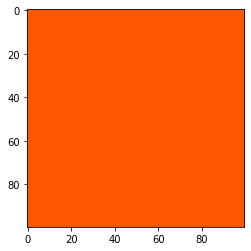

In [23]:
plt.imshow(RGB1)

# DCT in 2D

In [24]:
def CMatrix(N):
    C = np.zeros(shape=(N,N))
    for n in range(N):
        for k in range(N):
            if n == 0:
                c_n = np.sqrt(1/N)
            else:
                c_n = np.sqrt(2/N)
            C[n][k] = c_n * np.cos((2*k+1)*n*np.pi/(2*N))
    return C
    
C = CMatrix(N=2048)

Das Inverse der Matrix $\mathbf{C}$, $\mathbf{C}^{-1}$, ist gleich $\mathbf{C}^T$, i.e. $\mathbf{C}^{-1}\mathbf{C}=\mathbf{C}^T\mathbf{C}=1$. Wir überprüfen dies für den Fall $N=4$ indem wir einerseits
$\mathbf{C}^{-1}$ mit Methoden der linearen Algebra berechnen und dies vergleichen mit $\mathbf{C}^T$.

In [25]:
np.max(abs(LA.inv(C)-C.T))
# Hier wird gezeigt, dass inv(C) == C'

2.2969473545408903e-14

Weiter wollen wir zeigen, dass das erste Element $y_0$ der DCT-Transformierten $\mathbf{y}=\mathbf{C}\mathbf{x}$ eines Vektors $\mathbf{x}$ gleich der DC-Komponente (Gleichstrom-Komponente) dieses Vektors ist, also im Wesentlichen dem Mittelwert der Komponenten des Vektors entspricht.

In [26]:
x = np.array([1, 1, 1, 1])
y = np.dot(C, x.T)
print(y)

ValueError: shapes (2048,2048) and (4,) not aligned: 2048 (dim 1) != 4 (dim 0)

In [ ]:
def dct1d(x):
    C = CMatrix(X.shape[0]) # N
    return np.dot(C,x.T)

In [ ]:
def dct2d(X):
    CL = CMatrix(X.shape[0]) # m
    CR = CMatrix(X.shape[1]) # n
    Y = np.dot(np.dot(CL, X), CR.T)
    return Y

def idct2d(Y):
    CL = CMatrix(Y.shape[0]) # m
    CR = CMatrix(Y.shape[1]) # n
    X = np.dot(np.dot(CL.T, Y), CR)
    return X